# Object Detection

## Using RetinaNet

In [ ]:
import keras_hub
import tensorflow as tf
import numpy as np

url = "https://s3.us-east-1.amazonaws.com/book.keras.io/3e/seurat.jpg"

path = tf.keras.utils.get_file(origin=url)
image = np.array([tf.keras.utils.load_img(path)])

retinanet_detector = keras_hub.models.ObjectDetector.from_preset(
    "retinanet_resnet50_fpn_v2_coco",
    bounding_box_format="rel_xywh",
)
predictions = retinanet_detector.predict(image)

100%|██████████| 1.59k/1.59k [00:00<00:00, 3.50MB/s]


100%|██████████| 8.54k/8.54k [00:00<00:00, 14.4MB/s]


100%|██████████| 146M/146M [00:10<00:00, 14.6MB/s]


100%|██████████| 121M/121M [00:09<00:00, 13.4MB/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


In [ ]:
predictions

{'boxes': array([[[ 0.02753794,  0.6064431 ,  0.2810782 ,  0.16598892],
         [ 0.2891748 ,  0.5238684 ,  0.09747802,  0.18231204],
         [ 0.73485565,  0.25407776,  0.21398178,  0.52436936],
         [ 0.62694764,  0.4569073 ,  0.06340256,  0.12547554],
         [ 0.43246704,  0.4307517 ,  0.04761261,  0.1219157 ],
         [ 0.37853137,  0.59619015,  0.14923061,  0.13791686],
         [ 0.3382101 ,  0.3094775 ,  0.04143906,  0.13842905],
         [ 0.43779597,  0.26162636,  0.11368454,  0.04007339],
         [ 0.5273706 ,  0.41608992,  0.10620204,  0.03688351],
         [ 0.3680033 ,  0.3795195 ,  0.03503273,  0.06919277],
         [ 0.27275172,  0.40733016,  0.08063427,  0.03161575],
         [-0.00125   , -0.00125   ,  0.        ,  0.        ],
         [-0.00125   , -0.00125   ,  0.        ,  0.        ],
         [-0.00125   , -0.00125   ,  0.        ,  0.        ],
         [-0.00125   , -0.00125   ,  0.        ,  0.        ],
         [-0.00125   , -0.00125   ,  0.       

In [ ]:
predictions["boxes"][0][0]

array([0.02753794, 0.6064431 , 0.2810782 , 0.16598892], dtype=float32)

---
## ℹ️
We have four different model outputs: bounding boxes, confidences, labels, and the total number of detections. The model can predict a total of 100 objects for each input model.

In [ ]:
[(k, v.shape) for k, v in predictions.items()]

[('boxes', (1, 100, 4)),
 ('confidence', (1, 100)),
 ('labels', (1, 100)),
 ('num_detections', (1,))]

In [ ]:
### Helper Functions ###

import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from matplotlib.patches import Rectangle

color_map = {0: "gray"}

def label_to_color(label):
    # Uses the golden ratio to generate new hues of a bright color with
    # the HSV colorspace
    if label not in color_map:
        h, s, v = (len(color_map) * 0.618) % 1, 0.5, 0.9
        color_map[label] = hsv_to_rgb((h, s, v))
    return color_map[label]

def draw_image(ax, image):
    # Draws the image on a unit cube with (0, 0) at the top left
    ax.set(xlim=(0, 1), ylim=(1, 0), xticks=[], yticks=[], aspect="equal")
    image = plt.imread(image)
    height, width = image.shape[:2]
    # Pads the image so it fits inside the unit cube
    hpad = (1 - height / width) / 2 if width > height else 0
    wpad = (1 - width / height) / 2 if height > width else 0
    extent = [wpad, 1 - wpad, 1 - hpad, hpad]
    ax.imshow(image, extent=extent)


def draw_box(ax, box, text, color):
    x, y, w, h = box
    ax.add_patch(Rectangle((x, y), w, h, lw=2, ec=color, fc="none"))
    textbox = dict(fc=color, pad=1, ec="none")
    ax.text(x, y, text, c="white", size=10, va="bottom", bbox=textbox)

def draw_final_image(path, predictions):
  fig, ax = plt.subplots(dpi=300)
  draw_image(ax, path)
  num_detections = predictions["num_detections"][0]
  for i in range(num_detections):
      box = predictions["boxes"][0][i]
      label = predictions["labels"][0][i]
      label_name = keras_hub.utils.coco_id_to_name(label)
      draw_box(ax, box, label_name, label_to_color(label))
  plt.show()



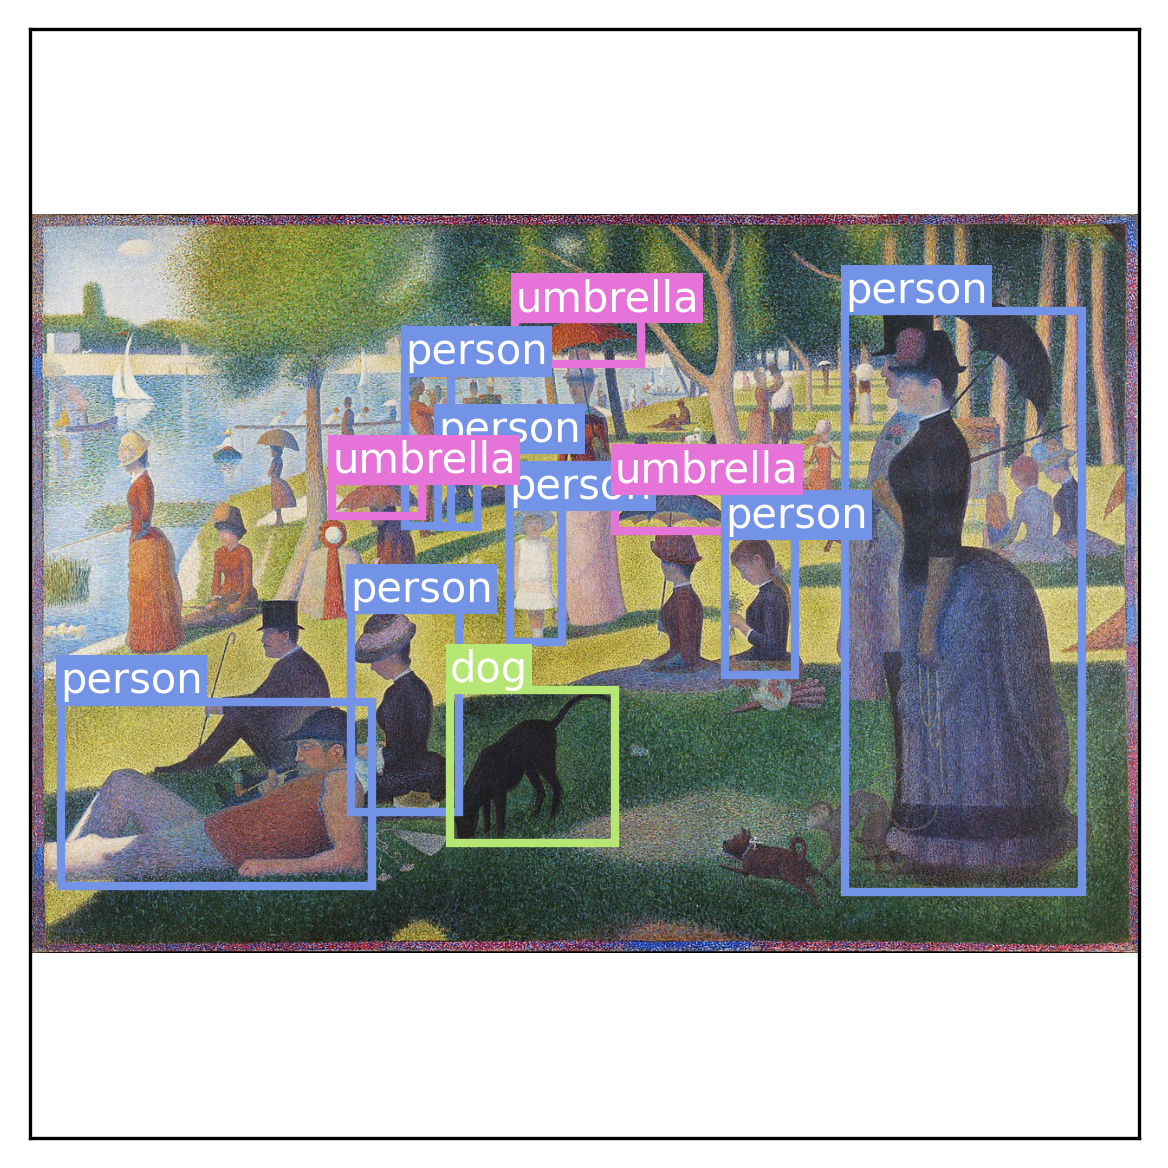

In [ ]:
draw_final_image(path, predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


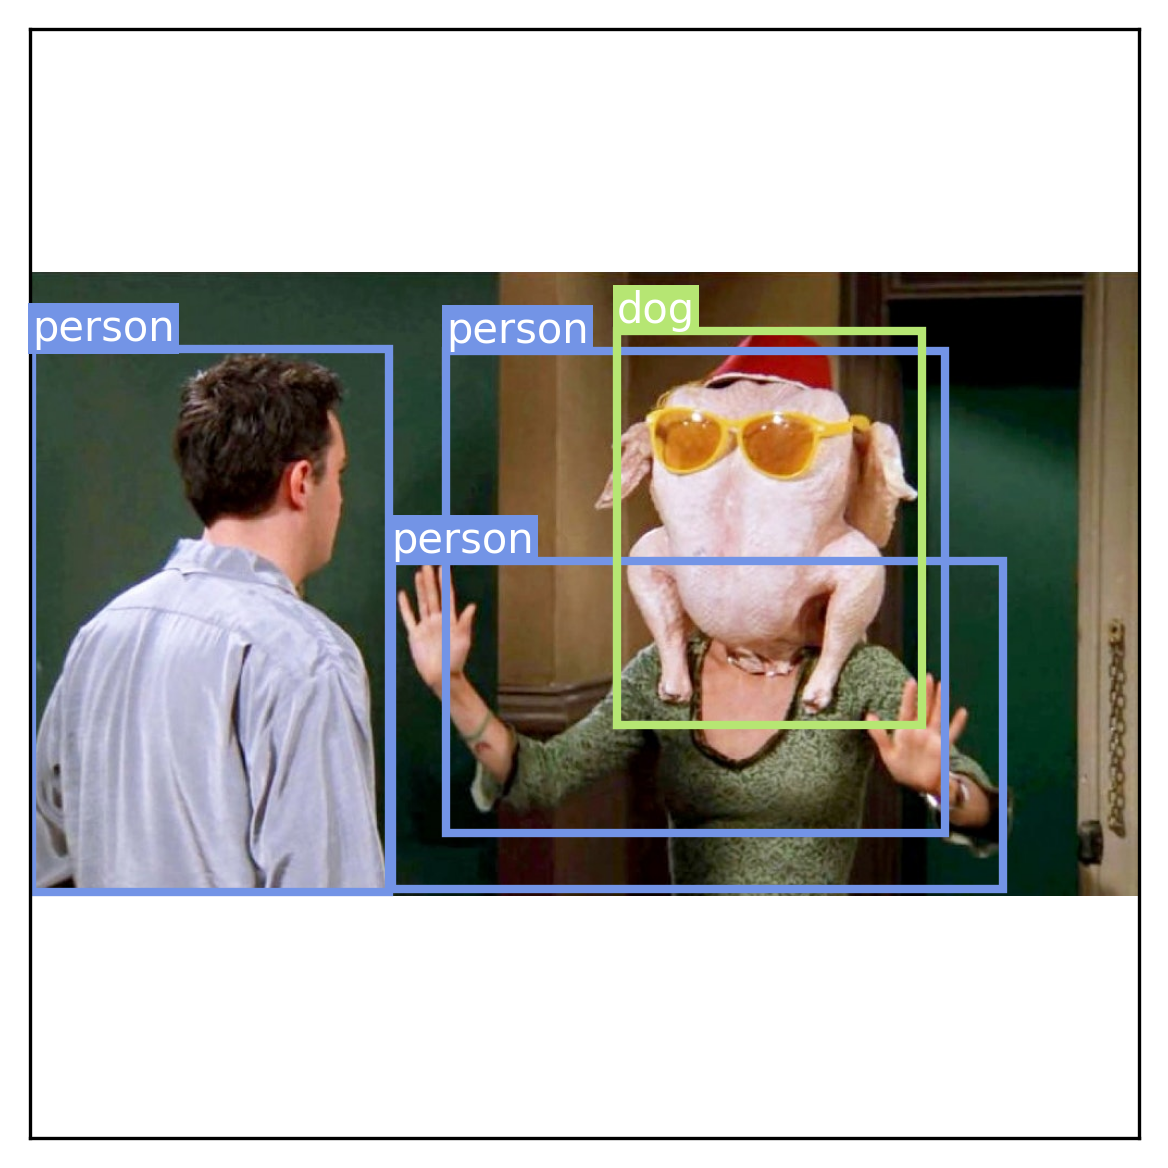

In [ ]:
# Example 2

path_2 = "test.jpg"
image_2 = np.array([tf.keras.utils.load_img(path_2)])
predictions_2 = retinanet_detector.predict(image_2)
draw_final_image(path_2, predictions_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


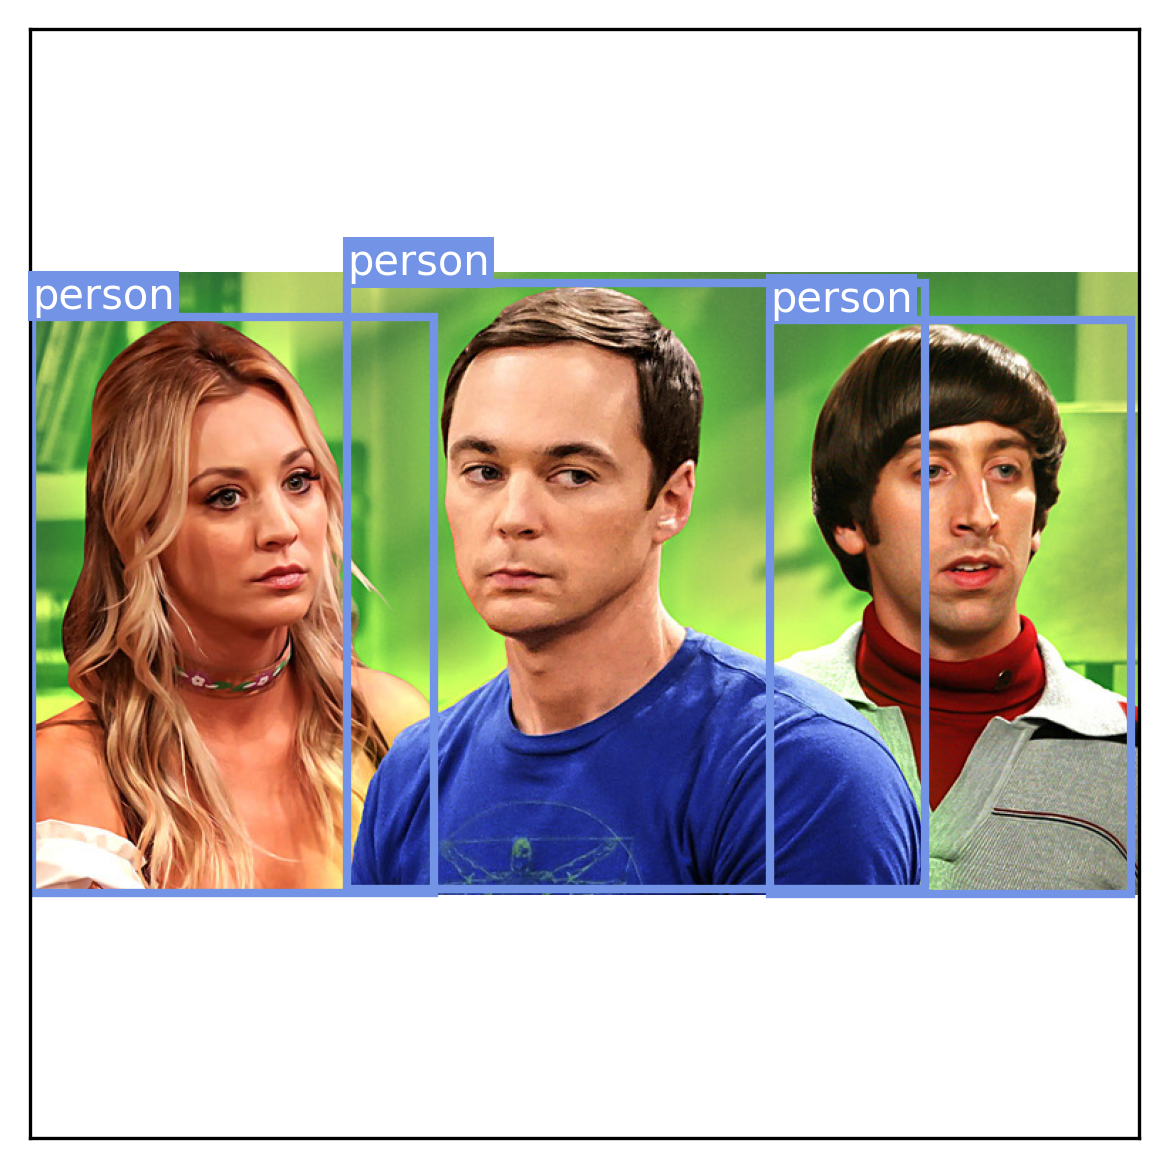

In [ ]:
# Example 3

path_3 = "image9.jpg"
image_3 = np.array([tf.keras.utils.load_img(path_3)])
predictions_3 = retinanet_detector.predict(image_3)
draw_final_image(path_3, predictions_3)

## Using YOLO

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use yolov8s, yolov8m, or yolov8l for larger models

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load image
image_path = 'image9.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Perform detection
results = model(image)
results


0: 384x640 3 persons, 94.9ms
Speed: 6.8ms preprocess, 94.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

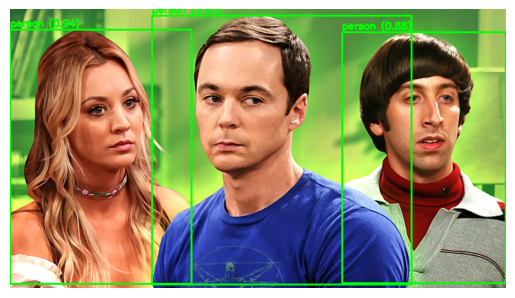

In [ ]:
# Display image with detections
for result in results:
    boxes = result.boxes.xyxy  # Bounding boxes coordinates
    classes = result.boxes.cls  # Class IDs
    scores = result.boxes.conf  # Confidence scores
    for box, cls, score in zip(boxes, classes, scores):
        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[int(cls)]} ({score:.2f})"

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(image)
plt.axis("off")
plt.show()


0: 448x640 2 zebras, 1 giraffe, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 3.2ms postprocess per image at shape (1, 3, 448, 640)
giraffe (0.95)
zebra (0.94)
zebra (0.93)


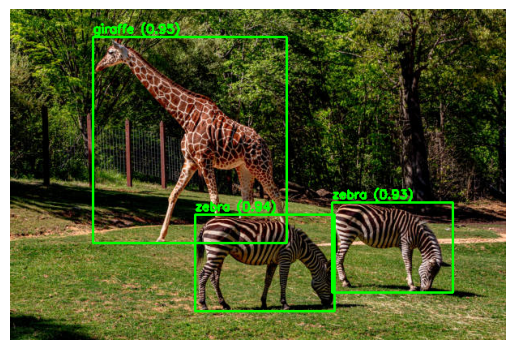

In [ ]:
# Load image
def predict_and_show_with_YOLO(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # Perform detection
  results = model(image)
  # Display image with detections
  for result in results:
      boxes = result.boxes.xyxy  # Bounding boxes coordinates
      classes = result.boxes.cls  # Class IDs
      scores = result.boxes.conf  # Confidence scores

      for box, cls, score in zip(boxes, classes, scores):

          x1, y1, x2, y2 = map(int, box)
          label = f"{model.names[int(cls)]} ({score:.2f})"
          print(label)
          cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
          cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

predict_and_show_with_YOLO('zoo.jpg')



0: 288x640 1 person, 3 elephants, 8.4ms
Speed: 2.2ms preprocess, 8.4ms inference, 2.7ms postprocess per image at shape (1, 3, 288, 640)
elephant (0.93)
elephant (0.73)
elephant (0.53)
person (0.27)


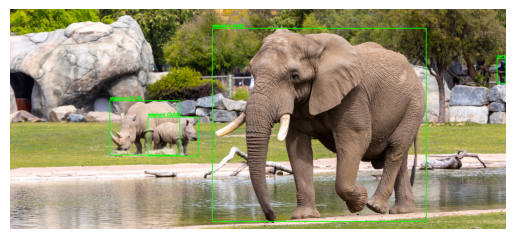

In [ ]:
predict_and_show_with_YOLO('zoo2.jpg')

# Using Pretrained Models


0: 480x640 1 License_Plate, 18.4ms
Speed: 2.8ms preprocess, 18.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
License_Plate (0.78)


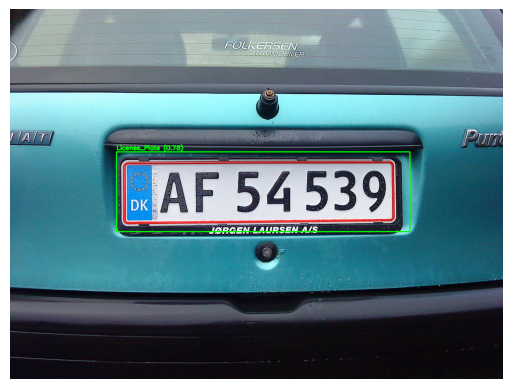

In [ ]:
# https://huggingface.co/morsetechlab/yolov11-license-plate-detection
model = YOLO('license-plate-finetune-v1l.pt')
image = cv2.imread("plate.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Perform detection
results = model(image)
# Display image with detections
for result in results:
    boxes = result.boxes.xyxy  # Bounding boxes coordinates
    classes = result.boxes.cls  # Class IDs
    scores = result.boxes.conf  # Confidence scores

    for box, cls, score in zip(boxes, classes, scores):

        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[int(cls)]} ({score:.2f})"
        print(label)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(image)
plt.axis("off")
plt.show()